# Lead Scoring Case Study

## Submitted by
- Kumar Kanishka

## 1. Initializing Python

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries
!pip install statsmodels
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# importing logistic regression libraries and methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## 2. Importing and Analyzing the dataframe

In [3]:
# Importing the Leads data file
lead_df = pd.read_csv('Leads.csv')

In [4]:
# Checking the top 5 rows of the DF 
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape
lead_df.shape

(9240, 37)

In [6]:
# Checking the info
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 3. Cleaning the dataframe

### (i) Dropping unique identifiers

In [7]:
# Checking if Lead Number is a unique identifier
print(lead_df['Lead Number'].value_counts().count())

# Checking if prospect ID is a unique identifeir
print(lead_df['Prospect ID'].value_counts().count())



9240
9240


Since both Lead Number and Prospect ID columns contain unique identifiers, they are not going to be of any help in our model 

In [8]:
# Dropping the columns which will not affect the model
dropcols = ['Prospect ID','Lead Number']
lead_df.drop(dropcols, axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### (ii) Finding & Dropping columns with only one value

In [9]:
# Finding the number of unique values in each column
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

One can drop columns with only one unique value as they wont't help with building our model

In [10]:
# Dropping columns with only one unique value
dropcols=['Magazine','I agree to pay the amount through cheque','Receive More Updates About Our Courses',
          'Get updates on DM Content','Update me on Supply Chain Content']
lead_df.drop(dropcols,axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


### (iii) Dropping columns with high number(s) of missing values

There are certain values which are marked as 'Select' in all of the columns. This value is occurs when the user does not confirm any selection, and can be treated as a missing value. We are replacing 'Select' with 'nan'.

In [11]:
#Replacing 'Select' with 'Nan'
lead_df.replace('Select',np.nan, inplace=True)

In [12]:
# Finding the percentage of missing values in each column
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [13]:
# Dropping columns with more than 40% missing data
dropcols=['Lead Quality','Lead Profile','Asymmetrique Activity Index',
          'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education']
lead_df.drop(dropcols,axis=1,inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [14]:
# Checking the percentage of missing values in missing columns after dropping columns
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

We should analyze the columns that still have a high number of missing values

#### (i) Country Column

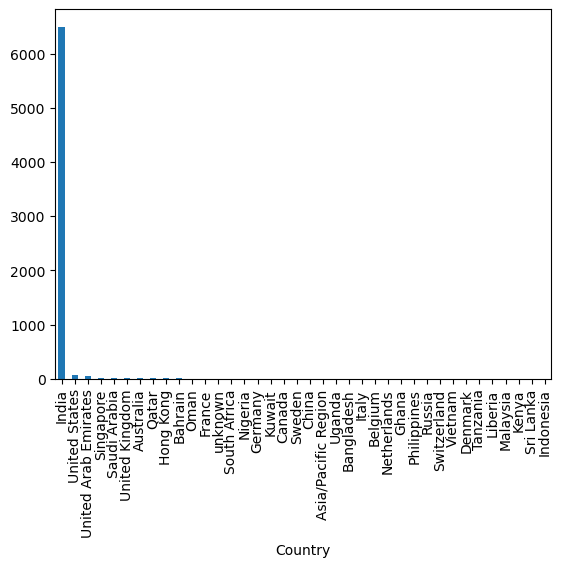

In [15]:
# Analyzing the spread of values in the country column
lead_df.Country.value_counts().plot.bar()
plt.show()

In [16]:
# Number of rows where country is not India
lead_df.Country[lead_df.Country!='India'].count()

287

Let's drop this column due to its extreme skewness in the data

In [17]:
#Dropping the column 'Country'
lead_df.drop('Country', axis=1, inplace=True)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,NaN,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### (ii) What is your current occupation

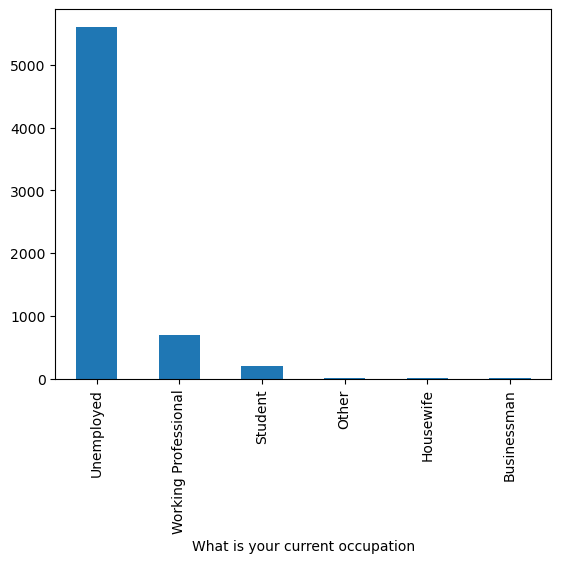

In [18]:
# Displaying the spread of current occupation
lead_df['What is your current occupation'].value_counts().plot.bar()
plt.show()

Since most users fall under the Unemployed category, we can use this value to fill in the missing values in this column

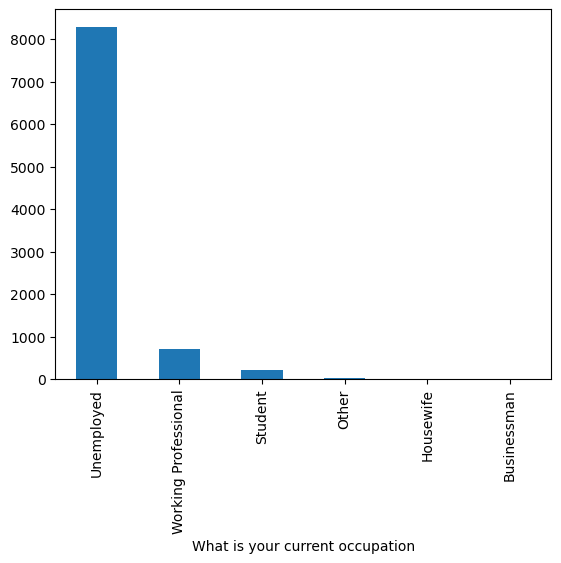

In [19]:
#Replacing missing values with "Unemployed" value
lead_df['What is your current occupation'].fillna('Unemployed', inplace=True)

#Reviewing the spread again to confirm that missing values are replaced with the Unemployed category
lead_df['What is your current occupation'].value_counts().plot.bar()
plt.show()

#### (iii) Specialization

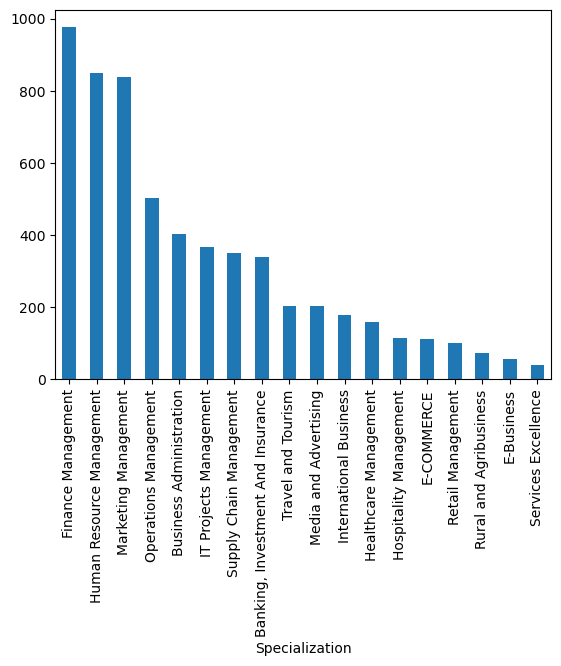

In [20]:
#Analyzing the spread of values in the Specialization column
lead_df.Specialization.value_counts().plot.bar()
plt.show()

The spread in specialization seems to be important. Given that the majority of users are categorized as unemployed, we can replace missing values in this column with a placeholder such as "none."

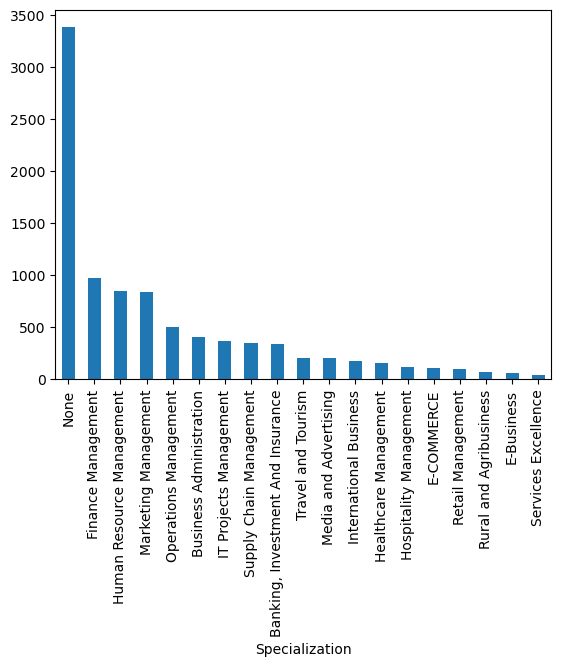

In [21]:
#Replacing missing values with "None" value
lead_df.Specialization.fillna('None', inplace=True)

#Checking the spread again to confirm that missing values are filled with the None value
lead_df.Specialization.value_counts().plot.bar()
plt.show()

#### (iv) What matters most to you in choosing a course

In [22]:
#Analysis of spread of values in the What matters most to you in choosing a course column
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [23]:
#Since this column is skewed, with only 3 entries other than Better Career Prospects, we can drop this column

# Dropping the What matters most to you in choosing a course column
lead_df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,None,...,No,No,No,No,No,No,Interested in other courses,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,None,...,No,No,No,No,No,No,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,None,...,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


#### (v) Tags

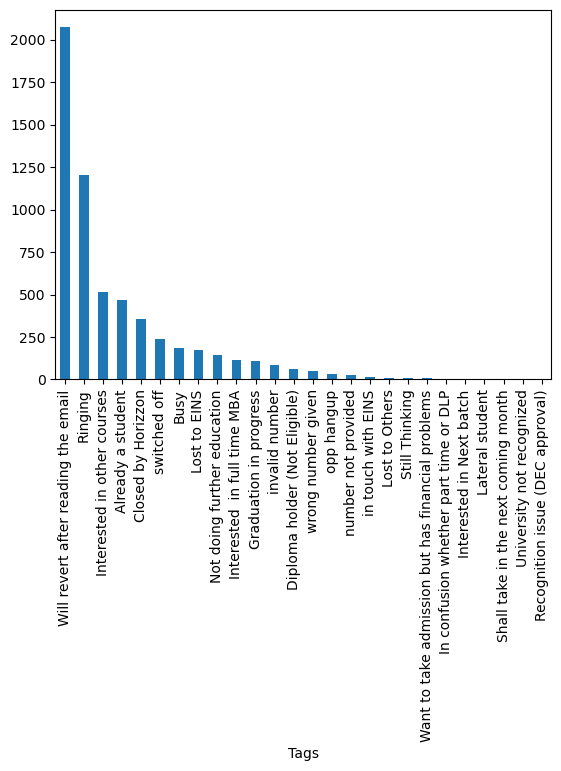

In [24]:
#Analysis of spread of values in the Specialization column
lead_df.Tags.value_counts().plot.bar()
plt.show()

In [25]:
#The Tags columns has many duplicate categories and having missing values close to 40%, we can drop this column

# Dropping the Tag column
lead_df.drop('Tags', axis=1, inplace=True)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,None,Unemployed,No,No,No,No,No,No,NaN,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,None,Unemployed,No,No,No,No,No,No,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,None,Unemployed,No,No,No,No,No,No,Mumbai,No,Modified


#### (vi) City

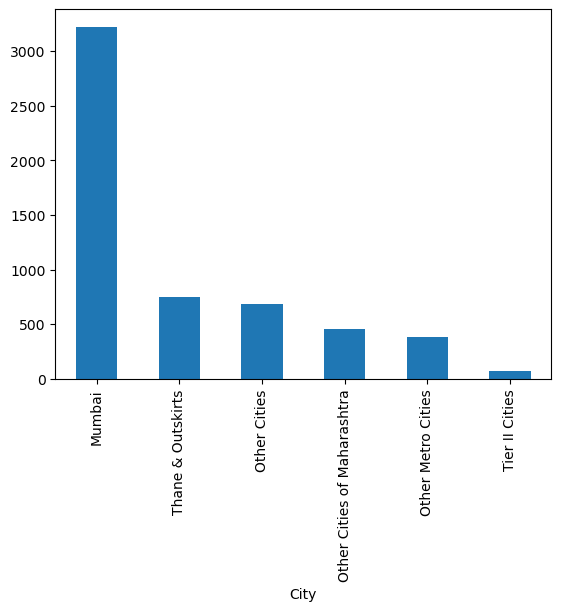

In [26]:
# Analysis of spread of values in the Specialization column
lead_df.City.value_counts().plot.bar()
plt.show()

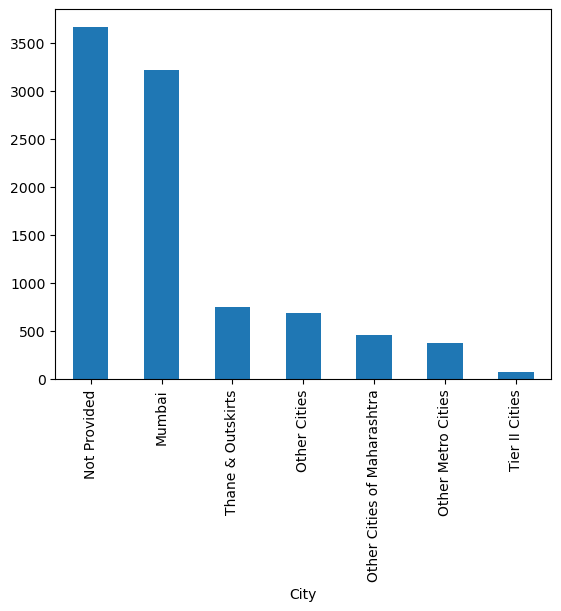

In [27]:
#To prevent potential bias in the results from imputing missing values, we will replace them with 'Not Provided

# Replacing missing values with 'Not Provided'
lead_df.City.fillna('Not Provided', inplace=True)

# Checking the spread of City column again
lead_df.City.value_counts().plot.bar()
plt.show()

Now that we have taken care of the columns with the highest number of missing values, lets check the missing value percentages again.

In [28]:
#Checking the value of percentage of missing values in missing columns again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

For Page Views Per Visit and TotalVisits, we can impute missing values with 0

In [29]:
# Imputing missing values in TotalVisits and Page Views Per Visit columns with 0
lead_df['Page Views Per Visit'].fillna(0, inplace=True)
lead_df.TotalVisits.fillna(0, inplace=True)

# Checking missing values again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

To understand the missing values for 'Last Activity', lets check the TotalVisits value

In [30]:
#Checking the spread of TotalVisits where 'Last Activity' value is missing
lead_df[lead_df['Last Activity'].isnull()].TotalVisits.value_counts()

TotalVisits
0.0    103
Name: count, dtype: int64

Since no Last Activity is recorded for these users, indicating they did not visit the website, they may have enrolled in the course through in-person or phone channels. Let's examine the conversion ratio

In [31]:
#Checking the converted values where Last Activity is missing
lead_df[lead_df['Last Activity'].isnull()].Converted.value_counts()

Converted
1    81
0    22
Name: count, dtype: int64

Given the high conversion ratio in this category, it's advisable to retain these rows. We will replace missing values with 'None' for our model

In [32]:
#Replacing missing values with 'None'
lead_df['Last Activity'].fillna('None', inplace=True)

We can drop the rows with missing values from the Lead Source column as the number of rows is <1%

In [33]:
#Dropping rows with missing values in Lead Source column
lead_df.dropna(subset='Lead Source', axis=0, inplace=True)

#Checking missing values again
round((lead_df.isnull().sum()/len(lead_df))*100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [34]:
#Checking Shape of final Dataframe
lead_df.shape

(9204, 20)

After dropping 36 rows, the data is clean.

### (iv) Standardizing data

In [35]:
#Defining a function to replace all Yes with 1 and No with 0
def map_yesno(x):
    return x.map({'Yes': 1, "No": 0})

In [36]:
#Converting all values in the specified columns to lowercase.
stdcols = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','A free copy of Mastering The Interview']
lead_df[stdcols]=lead_df[stdcols].apply(lambda x: x.lower() if type(x) == str else x)

In [37]:
#Applying the function to columns which require binary standardization
lead_df[stdcols] = lead_df[stdcols].apply(map_yesno)

#Checking the new dataframe
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,None,Unemployed,0,0,0,0,0,0,Not Provided,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,None,Unemployed,0,0,0,0,0,0,Not Provided,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,None,Unemployed,0,0,0,0,0,0,Mumbai,0,Modified


Now we can proceed with EDA

## (iv) EDA

### a. Univariate Analysis

#### i. Converted

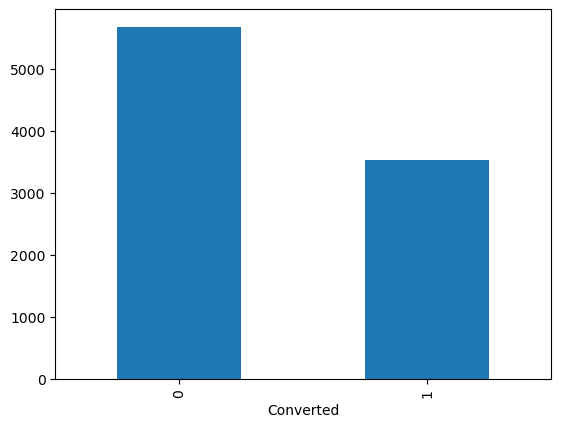

In [38]:
#Plotting of distribution of Converted column 
lead_df.Converted.value_counts().plot.bar()
plt.show()

In [39]:
#Finding the conversion ratio
round(100*lead_df[lead_df.Converted==1].Converted.count()/len(lead_df),2)

38.37

Inferences base on above:
- The current conversion ratio for leads is 38%
- The target conversion ratio is 80%

#### ii. Total Time Spent on Website`

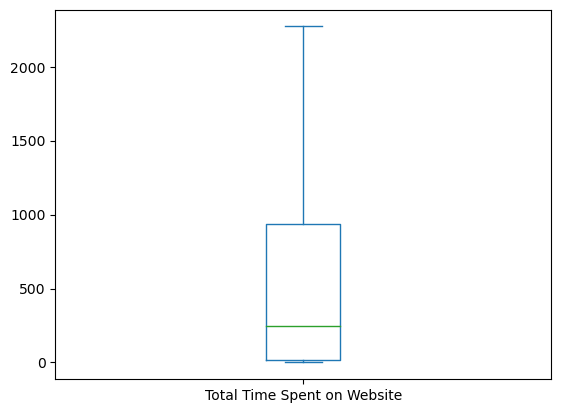

In [40]:
#Plotting a boxplot for the Total Time Spent on Website column
lead_df['Total Time Spent on Website'].plot.box()
plt.show()

In [41]:
#Describing the column values
lead_df['Total Time Spent on Website'].describe()

count    9204.000000
mean      489.005541
std       547.980340
min         0.000000
25%        14.000000
50%       250.000000
75%       938.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Inferences based on above:
- There are No outliers in the data
- 250 seconds is the median time spent on the company website 

#### iii. Page Views Per Visit

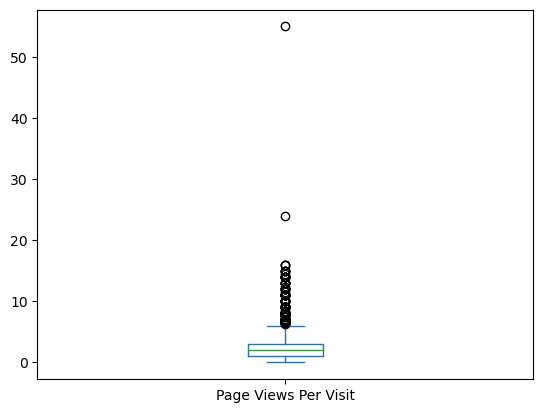

In [42]:
#Plotting a boxplot for the Page Views Per Visit column
lead_df['Page Views Per Visit'].plot.box()
plt.show()

In [43]:
#Describing the column values
lead_df['Page Views Per Visit'].describe()

count    9204.000000
mean        2.336674
std         2.163709
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Inferences based on above:
- There are several outliers in the data
- The median page views per visit on the company website is 2 pages

We saw the univariate analysis for most of the categorical variables. Now to proceed with Bivariate Analysis

### b. Bivariate Analysis

#### (i) Categorical variables vs Converted

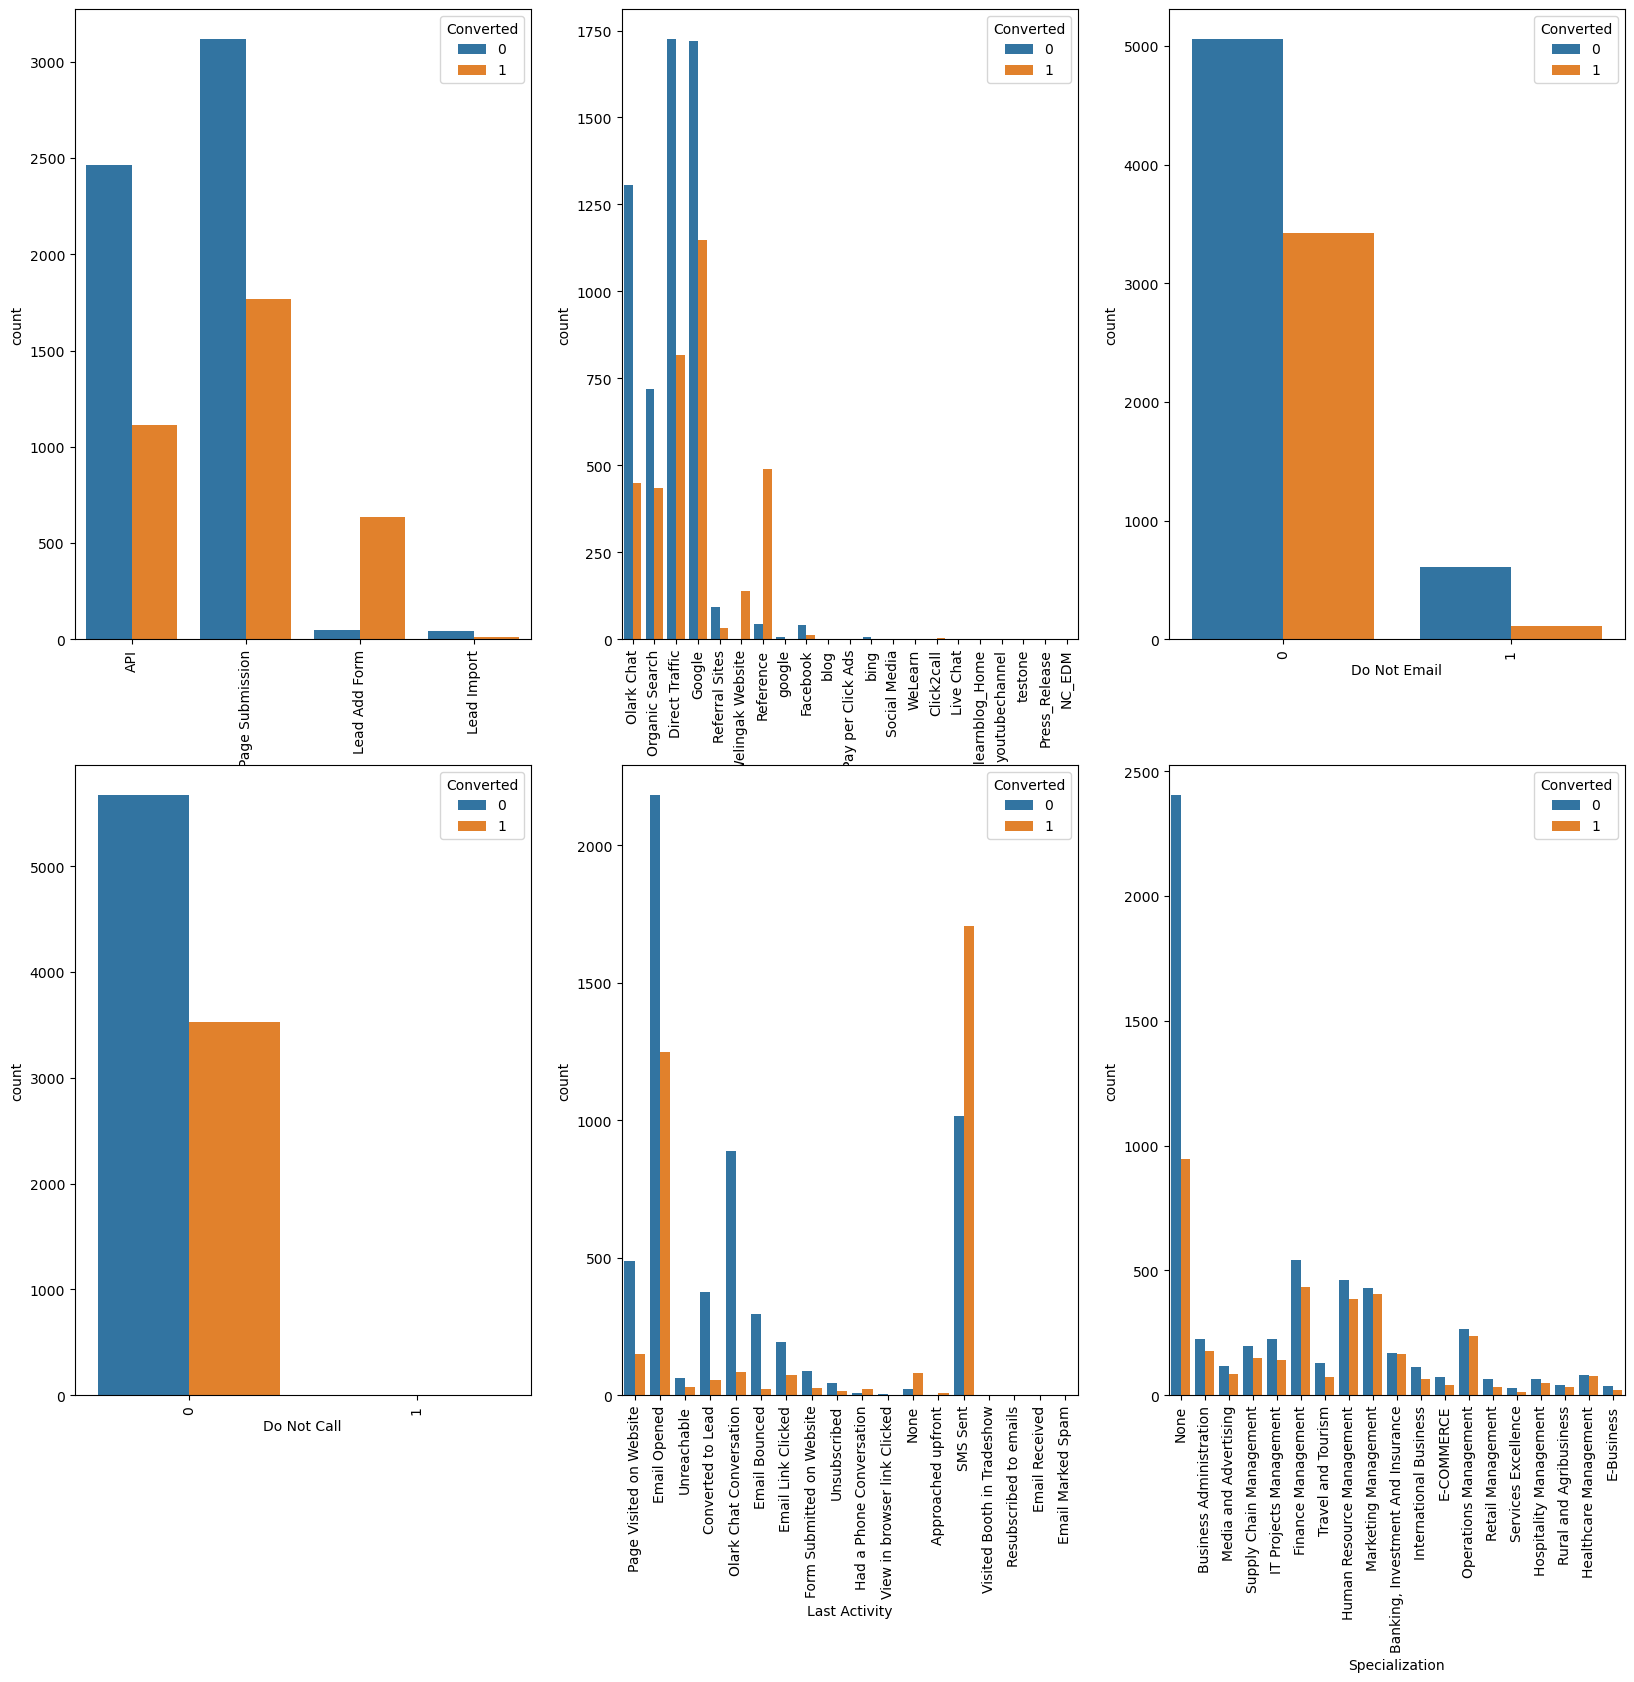

In [44]:
#Plotting the first set of categorical variables vs Converted

plt.figure(figsize=(20, 18))
plt.subplot(2,3,1)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'Lead Source', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Last Activity', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'Specialization', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

Inferences based on above:
- Users who fill out the Lead Add Form or come through references show a high conversion rate
- Users opting for 'Do not Email' or 'Do not Call' have lower conversion rates

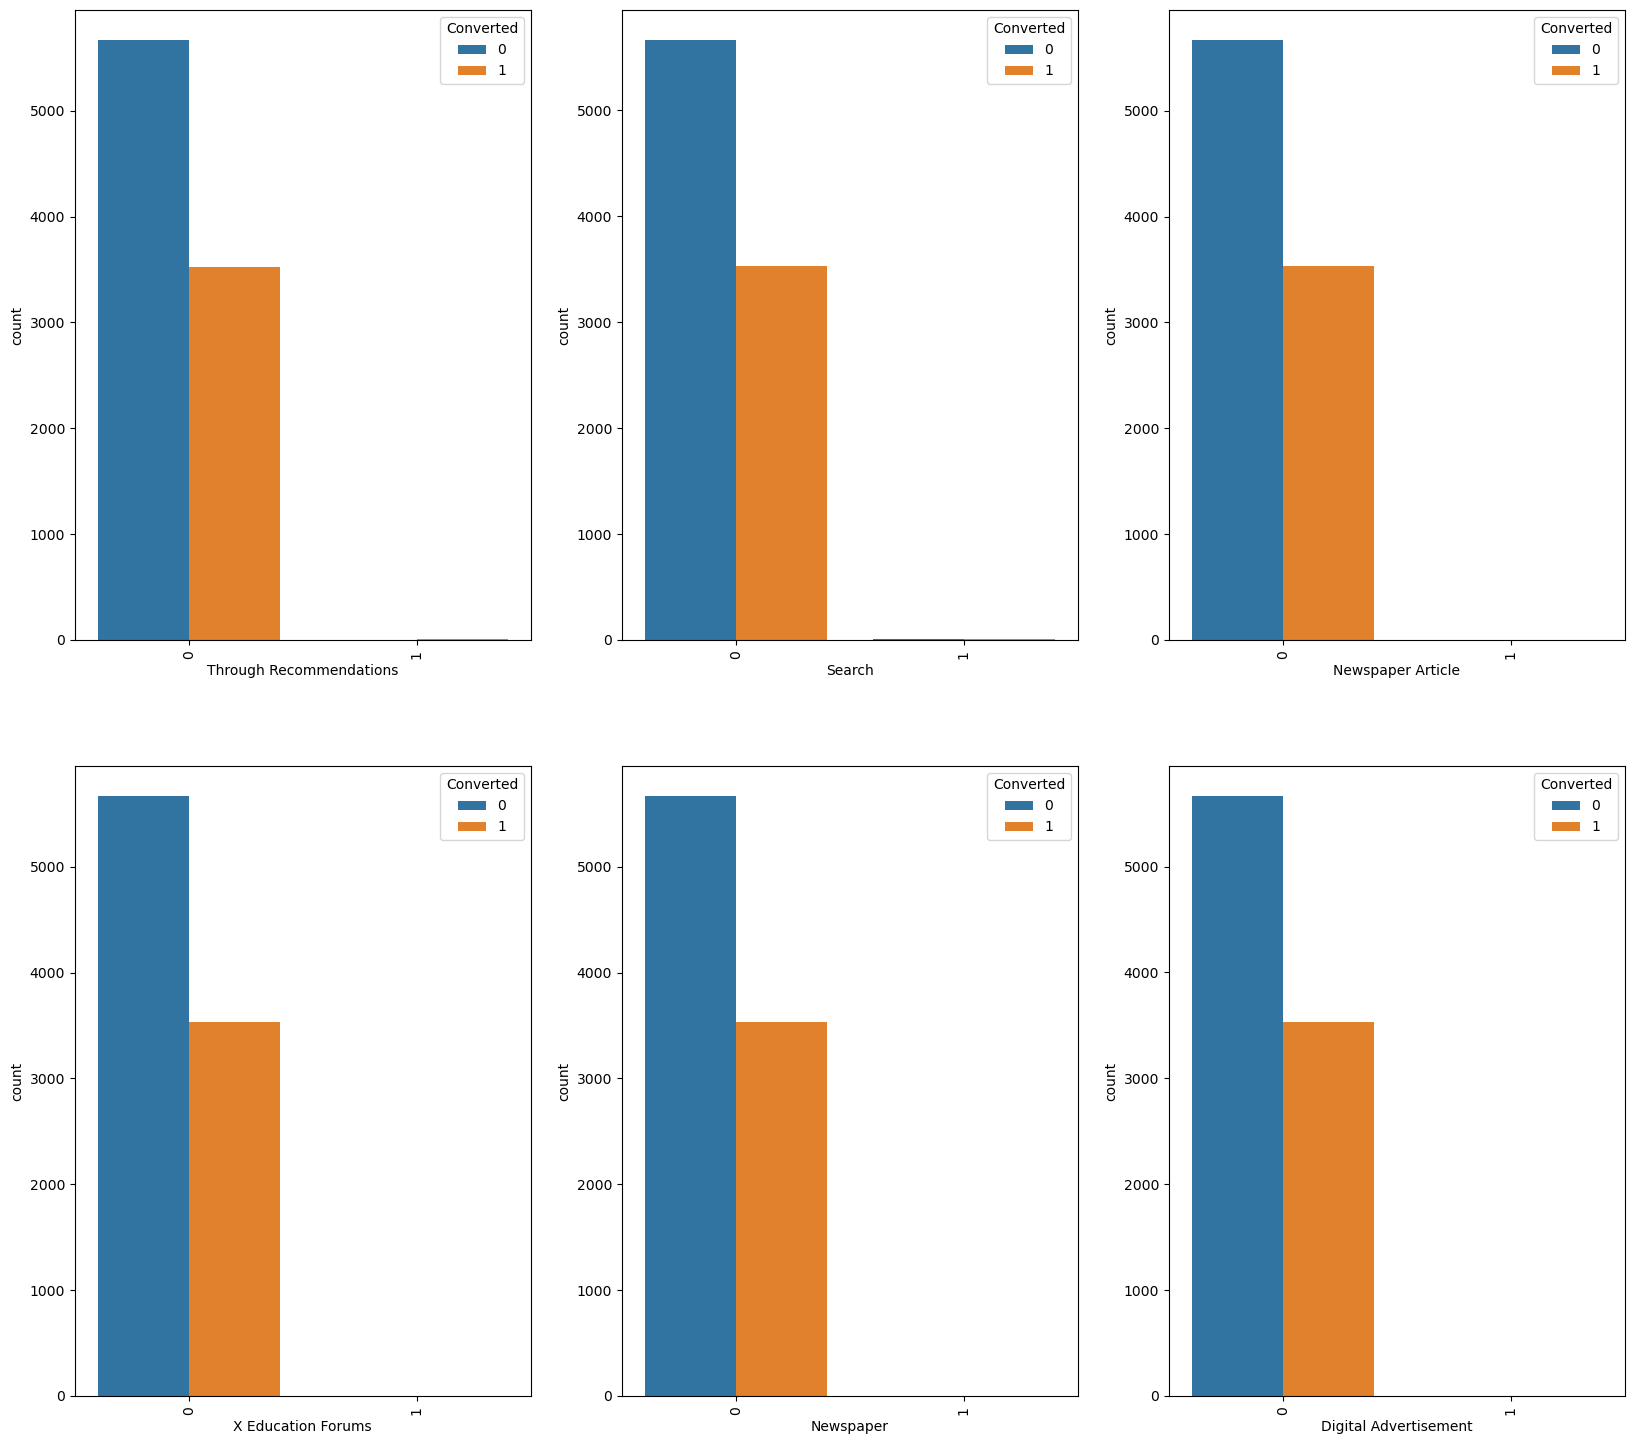

In [45]:
#Plotting the second set of categorical variables vs Converted

plt.figure(figsize=(20, 18))
plt.subplot(2,3,1)
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.countplot(x = 'Search', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

Inferences based on above:
- There are minimal variations in conversions based on where users viewed advertisements

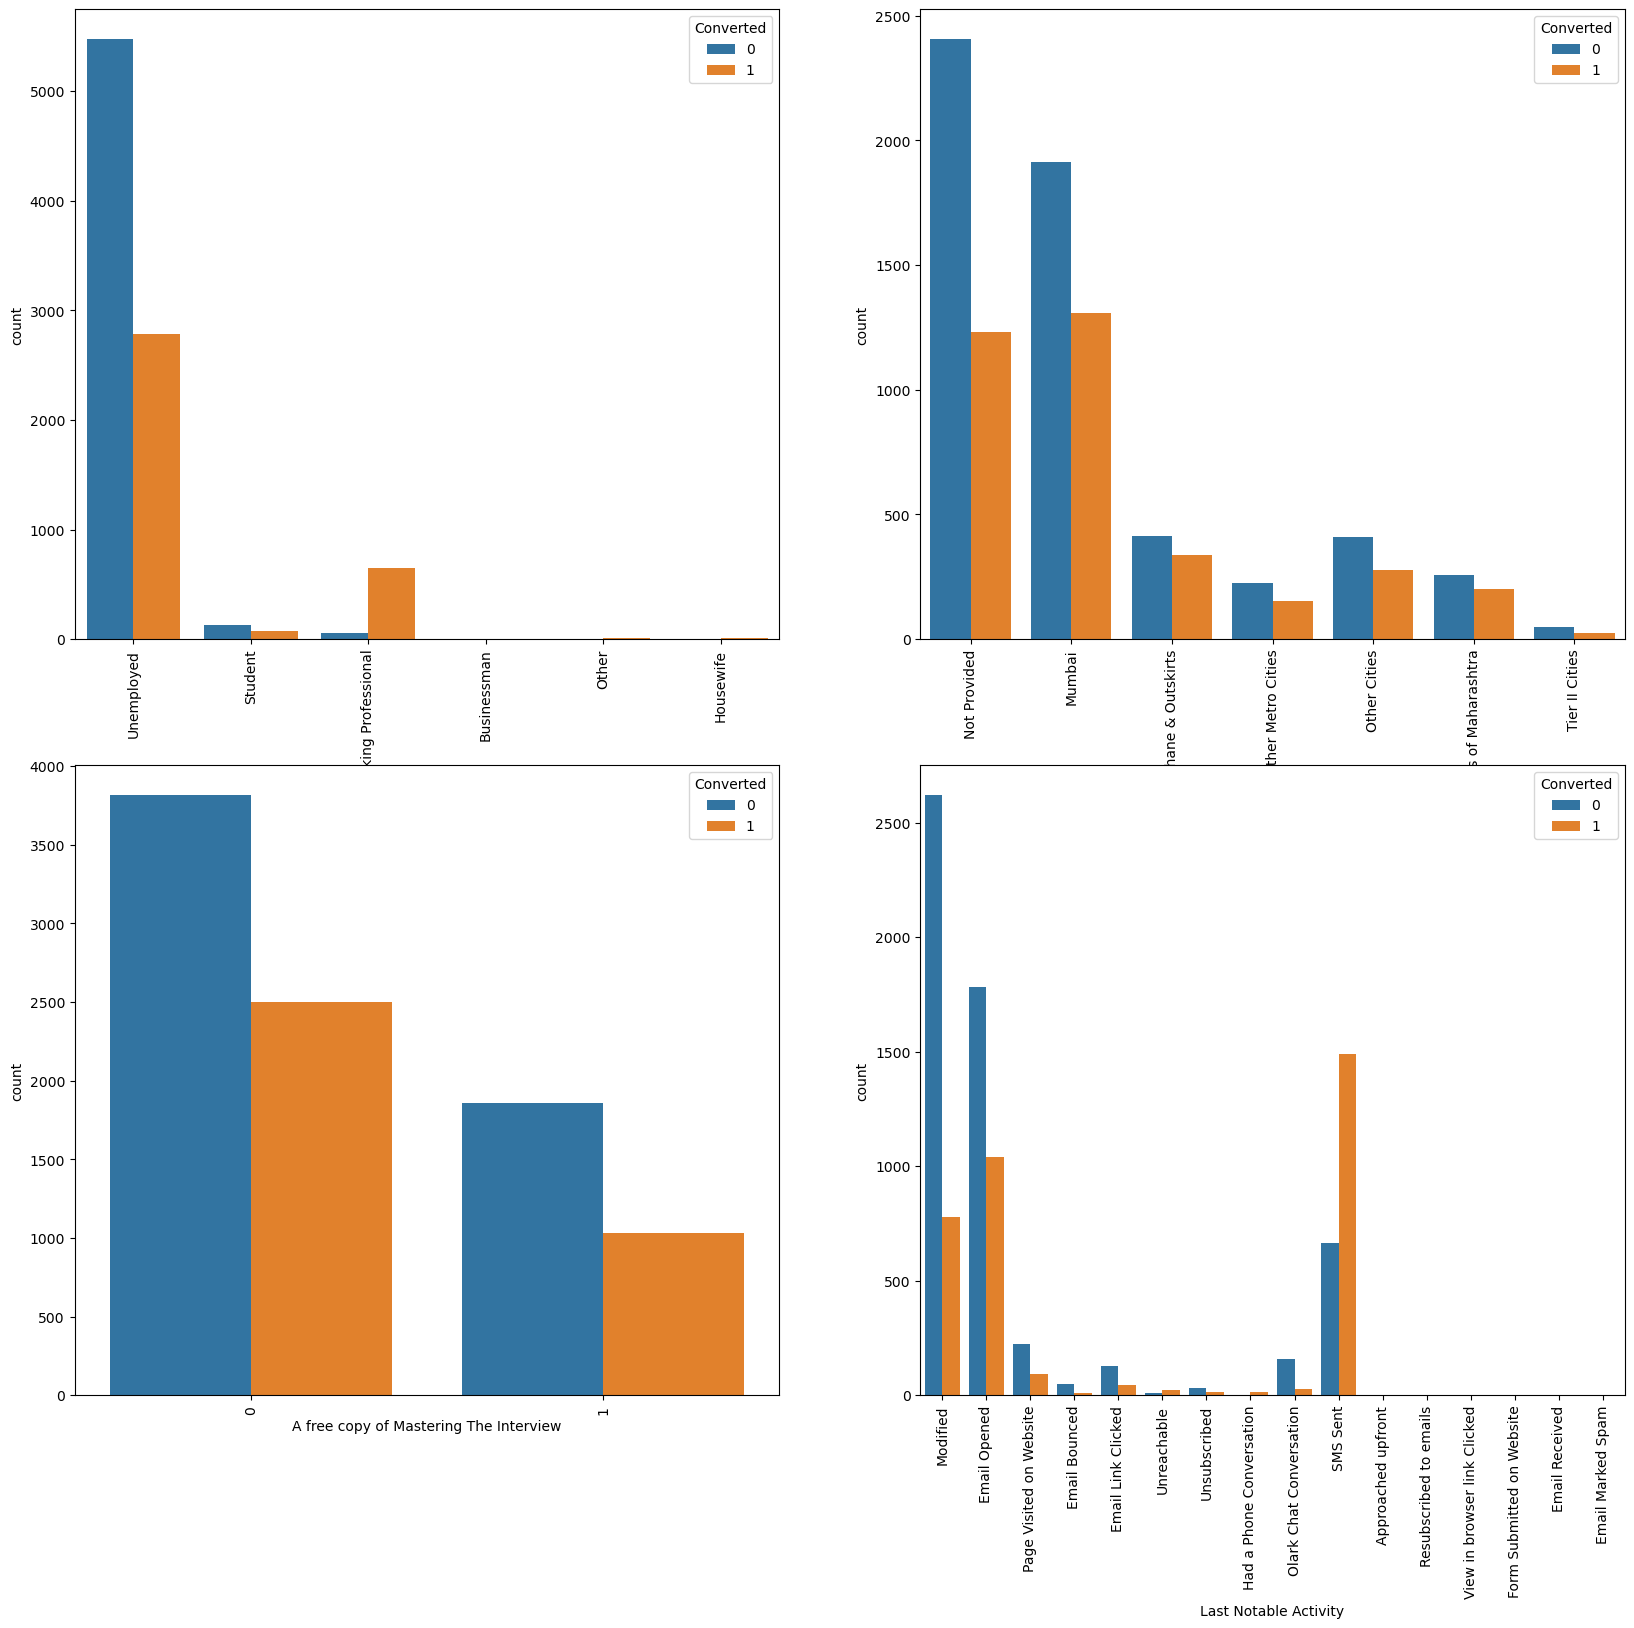

In [46]:
# Plotting the third set of categorical variables vs Converted

plt.figure(figsize=(20, 18))
plt.subplot(2,2,1)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x = 'City', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data = lead_df)
plt.xticks(rotation=90)
plt.show()

Inferences based on above:
- Working professionals have a high conversion rate
- Other categories do not seem to a high correlation with conversion rate

#### (ii) Numerical variables vs Converted

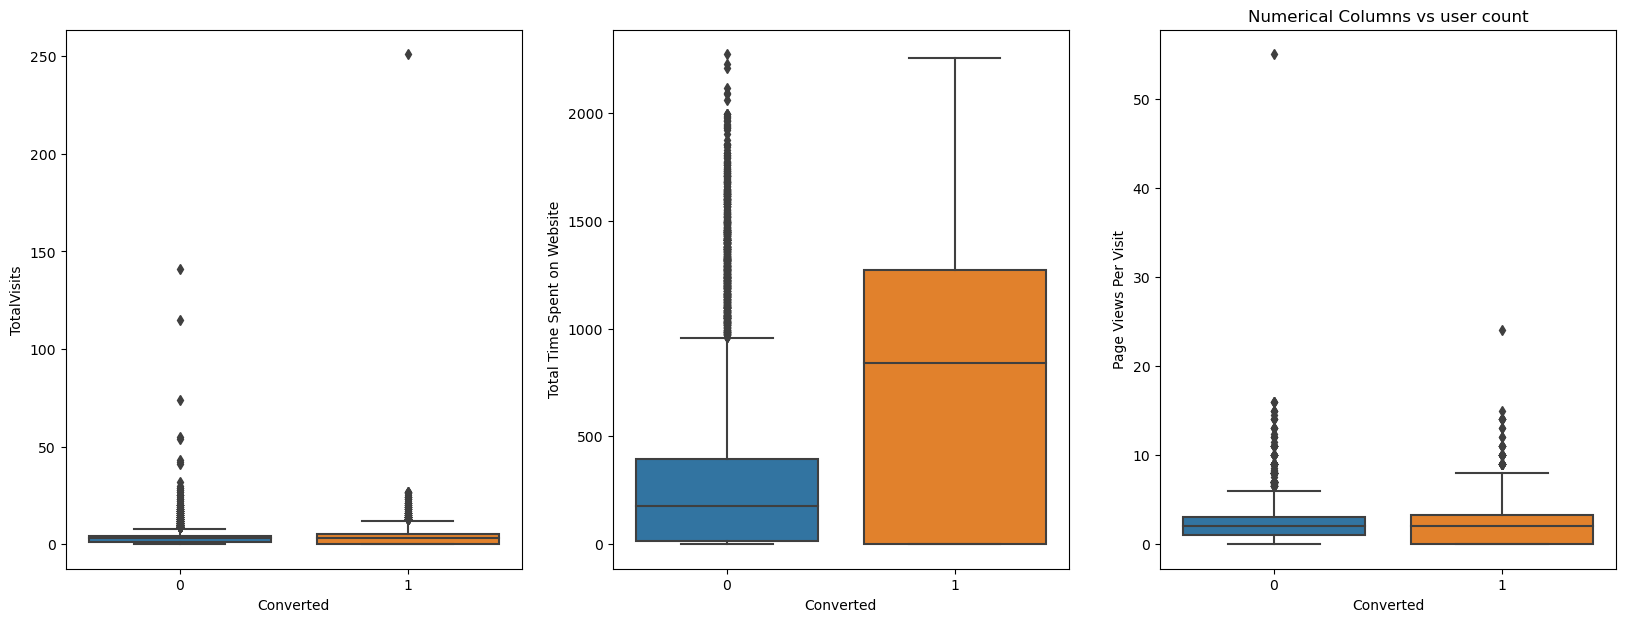

In [47]:
# Plotting the boxplots of numerical columns vs Converted
plt.figure(figsize=(20, 7))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)
plt.title("Numerical Columns vs user count")
plt.show()

Inferences based on above:
- Users who spend more time on the company website tend to convert at a higher rate
- Total visits and number of pages per visit do not significantly impact the conversion rate

## 5. Data Preparation

### a) Creating Dummy Variables for Categorical columns

In [48]:
#Creating dummy variable dataset for city and Specialization categorical columns and dropping the 'Not Provided' & 'None' columns
tempdummy=pd.get_dummies(lead_df[['City','Specialization']]).astype(int)
tempdummy.drop(['City_Not Provided','Specialization_None'], axis=1, inplace=True)
tempdummy

,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9238,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Concatenating the dummy variable dataset with main dataset
lead_df=pd.concat([lead_df,tempdummy], axis=1)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,None,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,None,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,None,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Dropping the Specialization and city columns
lead_df.drop(['Specialization','City'], axis=1, inplace=True)

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Generating dummy variables for all remaining categorical columns and excluding the first column.
catcols=['Lead Source', 'Last Activity','Lead Origin', 'What is your current occupation', 'Last Notable Activity']
tempdummy=pd.get_dummies(lead_df[catcols], drop_first=True).astype(int)
tempdummy.head()

,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
#Concatenating the dummy dataset with main dataset
lead_df = pd.concat([lead_df,tempdummy], axis=1)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,...,0,0,1,0,0,0,0,0,0,0


In [53]:
#Dropping the respective category columns
lead_df.drop(catcols, axis=1, inplace=True)

In [54]:
lead_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Plotting a heatmap to perform Multivariate analysis

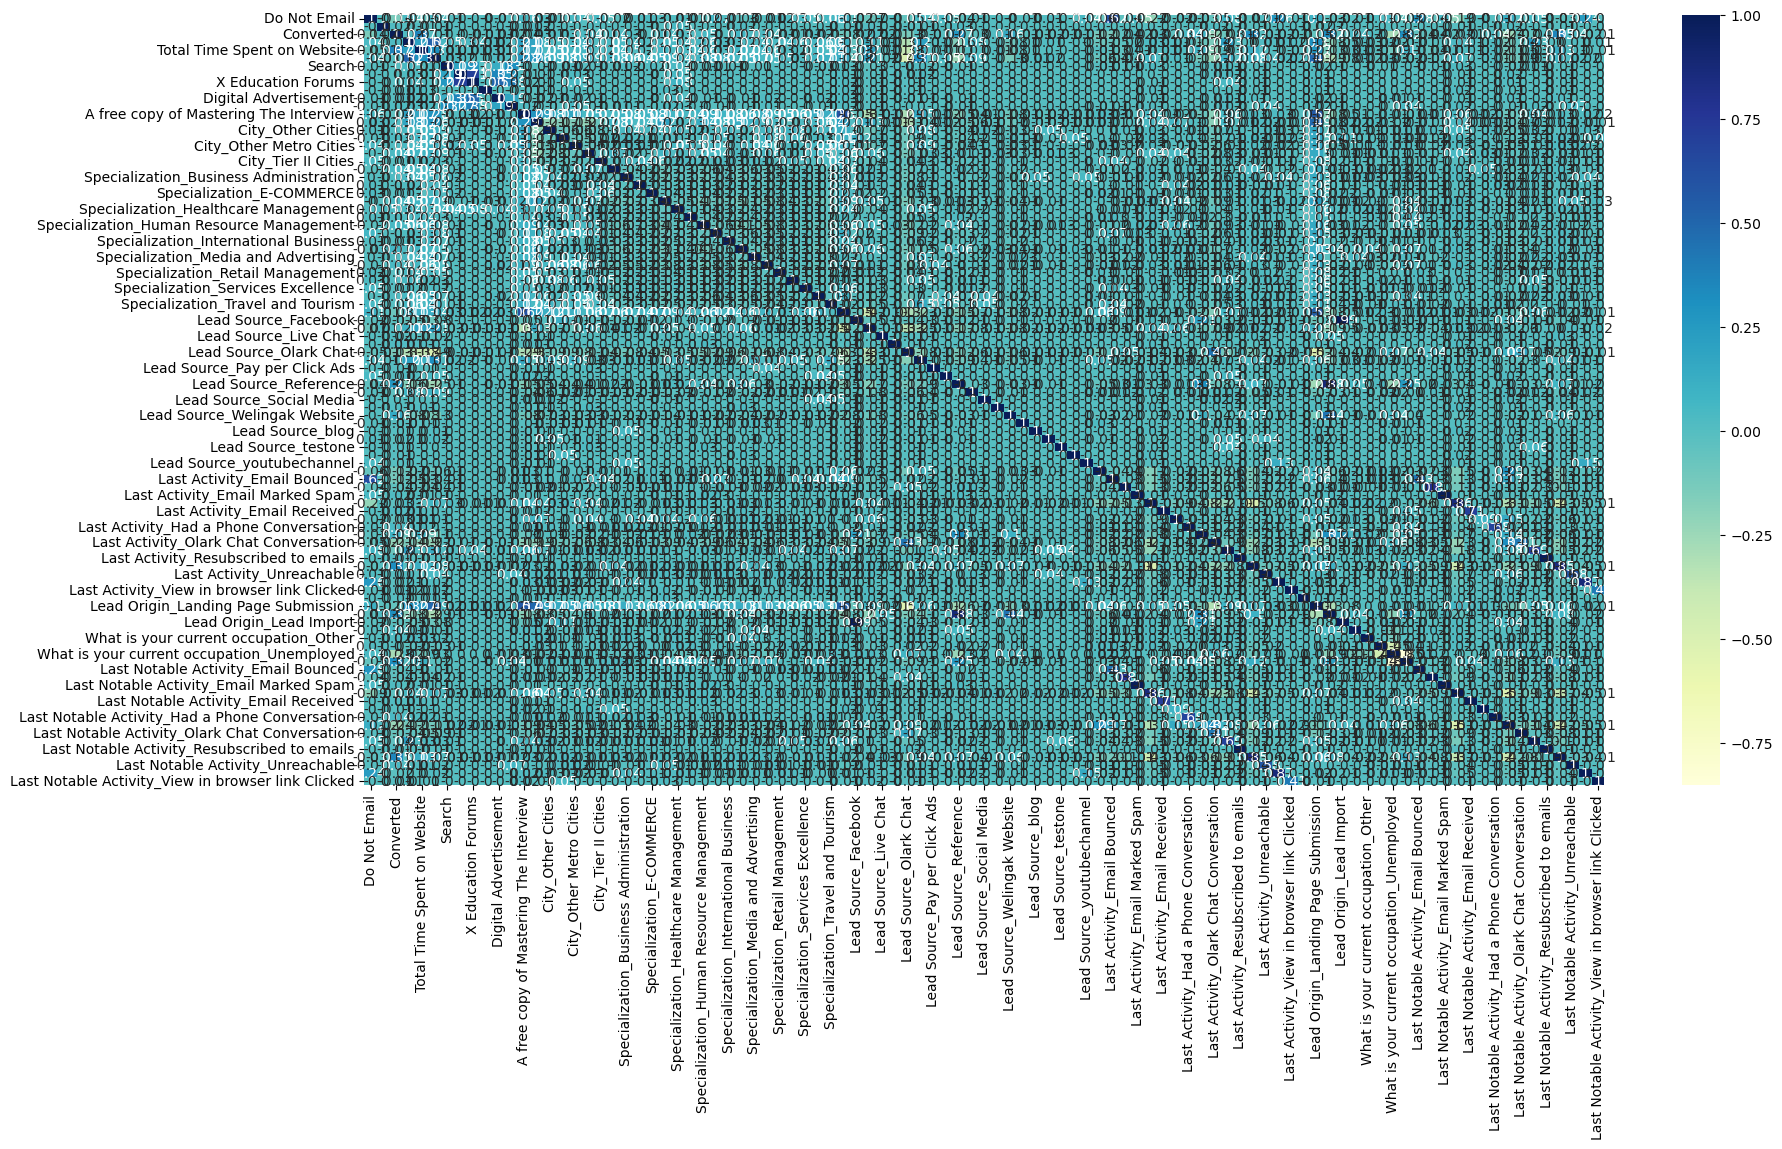

In [55]:
#Creating a heatmap for all  variables
plt.figure(figsize = (20, 10))
sns.heatmap(round(lead_df.corr(),2), annot = True, cmap="YlGnBu")
plt.show()

Inferences based on above:
- There seems to be high correlation at the moment with any columns

### b) Performing the Train-Test split


In [56]:
#Creating X and y
y = lead_df.pop('Converted')
X = lead_df
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
#Creating the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=40)
#Checking the train dataset
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7241,0,0,1.0,42,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1225,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4686,0,0,19.0,312,2.38,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58,0,0,17.0,409,8.50,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### c) Scaling the relevant features using StandardScaler

In [58]:
#Scaling the relevant features
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7241,0,0,-0.486412,-0.808389,-0.631447,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9226,0,0,-0.689638,-0.885317,-1.111407,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1225,0,0,-0.689638,-0.885317,-1.111407,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4686,0,0,3.171658,-0.313857,0.030898,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58,0,0,2.765206,-0.136192,2.968254,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 6. Building the Model

As there are so many columns, we need to use RFE to bring down the list of variables to a manageable number

### a) RFE Model

#### (i) Building the model

In [59]:
#Initialising the Logistic Regression instance
lr=LogisticRegression()

In [60]:
#Running RFE with 15 variables to be selected
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [61]:
#Checking list of columns selected by RFE and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 54),
 ('TotalVisits', False, 65),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 64),
 ('Search', False, 73),
 ('Newspaper Article', False, 62),
 ('X Education Forums', False, 60),
 ('Newspaper', False, 26),
 ('Digital Advertisement', False, 71),
 ('Through Recommendations', False, 49),
 ('A free copy of Mastering The Interview', False, 66),
 ('City_Mumbai', False, 10),
 ('City_Other Cities', False, 7),
 ('City_Other Cities of Maharashtra', False, 8),
 ('City_Other Metro Cities', False, 9),
 ('City_Thane & Outskirts', False, 12),
 ('City_Tier II Cities', False, 23),
 ('Specialization_Banking, Investment And Insurance', False, 39),
 ('Specialization_Business Administration', False, 41),
 ('Specialization_E-Business', False, 45),
 ('Specialization_E-COMMERCE', False, 57),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 42),
 ('Specialization_Hospitality Man

In [62]:
#Putting the 15 columns selected by RFE into a variable
col=X_train.columns[rfe.support_]

In [63]:
#Retaining only columns selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'City_Mumbai',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management

#### (ii) Assessment of the model

In [64]:
#Running the RFE model on the train columns
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the built model
res = logm1.fit()

#Summary using statmodels
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6903
Model:                            GLM   Df Residuals:                     6887
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2920.8
Date:                Wed, 29 May 2024   Deviance:                       5841.6
Time:                        00:31:56   Pearson chi2:                 7.14e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3847
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9363      0.048    -19.530      0.000      -1.030      -0.842
Do Not Email                                            -1.4120      0.156     -9.023      0.000      -1.719      -1.105
Total Time Spent on Website                              0.9651      0.034     28.503      0.000       0.899       1.032
Lead Source_Direct Traffic                              -0.5646      0.075     -7.508      0.000      -0.712      -0.417
Lead Source_Referral Sites                              -0.4461      0.307     -1.451      0.147      -1.049       0.157
Lead Source_Welingak Website                             2.7804      1.027      2.708      0.007       0.768       4.793
Lead Source_google                                     -22.7409   3.23e+04     -0.001      0.999   -6.33e+04    6.32e+04
Last Activity_Converted to Lead                         -1.3312      0.196     -6.779      0.000      -1.716      -0.946
Last Activity_None                                      -1.4833      0.498     -2.980      0.003      -2.459      -0.508
Last Activity_Olark Chat Conversation                   -1.0885      0.146     -7.431      0.000      -1.376      -0.801
Lead Origin_Lead Add Form                                3.4183      0.212     16.120      0.000       3.003       3.834
What is your current occupation_Housewife               23.6337   2.47e+04      0.001      0.999   -4.83e+04    4.83e+04
What is your current occupation_Working Professional     2.8304      0.183     15.506      0.000       2.473       3.188
Last Notable Activity_Had a Phone Conversation          23.7982   2.37e+04      0.001      0.999   -4.64e+04    4.65e+04
Last Notable Activity_SMS Sent                           1.4872      0.076     19.469      0.000       1.338       1.637
Last Notable Activity_Unreachable                        1.3557      0.498      2.720      0.007       0.379       2.333
========================================================================================================================
"""

#### (iii) Checking the VIFs

In [65]:
#Creation of VIF dataframe to check VIF values for all the columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Lead Origin_Lead Add Form,1.61
4,Lead Source_Welingak Website,1.30
2,Lead Source_Direct Traffic,1.20
13,Last Notable Activity_SMS Sent,1.19
11,What is your current occupation_Working Profes...,1.17
7,Last Activity_None,1.14
1,Total Time Spent on Website,1.13
0,Do Not Email,1.07
6,Last Activity_Converted to Lead,1.04
8,Last Activity_Olark Chat Conversation,1.04


Decision:
- VIF values are below the threshold of 5, so no columns need to be dropped based on VIF.
- However, the P-value for 'Lead Source_google' is significantly high. We will exclude this column in our next model.

### b) Model 2

#### i. Dropping the 'Lead Source_google' column

In [66]:
#Dropping the 'Lead Source_google' column
col = col.drop('Lead Source_google', 1)

#### (ii) Assessing the model

In [67]:
# Running the model again with the new set of columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fitting the built model
res = logm2.fit()

#Summary using statmodels
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6903
Model:                            GLM   Df Residuals:                     6888
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.8
Date:                Wed, 29 May 2024   Deviance:                       5845.5
Time:                        00:31:56   Pearson chi2:                 7.14e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9395      0.048    -19.605      0.000      -1.033      -0.846
Do Not Email                                            -1.4121      0.156     -9.026      0.000      -1.719      -1.106
Total Time Spent on Website                              0.9645      0.034     28.495      0.000       0.898       1.031
Lead Source_Direct Traffic                              -0.5620      0.075     -7.475      0.000      -0.709      -0.415
Lead Source_Referral Sites                              -0.4434      0.307     -1.442      0.149      -1.046       0.159
Lead Source_Welingak Website                             2.7803      1.027      2.708      0.007       0.768       4.793
Last Activity_Converted to Lead                         -1.3288      0.196     -6.767      0.000      -1.714      -0.944
Last Activity_None                                      -1.4816      0.498     -2.976      0.003      -2.457      -0.506
Last Activity_Olark Chat Conversation                   -1.0856      0.146     -7.412      0.000      -1.373      -0.799
Lead Origin_Lead Add Form                                3.4203      0.212     16.129      0.000       3.005       3.836
What is your current occupation_Housewife               23.6359   2.47e+04      0.001      0.999   -4.83e+04    4.83e+04
What is your current occupation_Working Professional     2.8318      0.183     15.515      0.000       2.474       3.189
Last Notable Activity_Had a Phone Conversation          23.8011   2.37e+04      0.001      0.999   -4.64e+04    4.65e+04
Last Notable Activity_SMS Sent                           1.4895      0.076     19.502      0.000       1.340       1.639
Last Notable Activity_Unreachable                        1.3581      0.498      2.725      0.006       0.381       2.335
========================================================================================================================
"""

#### (iii) Checking VIFs

In [68]:
# Creation of the VIF dataframe to check VIF values for all columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_Lead Add Form,1.61
4,Lead Source_Welingak Website,1.30
2,Lead Source_Direct Traffic,1.20
12,Last Notable Activity_SMS Sent,1.19
10,What is your current occupation_Working Profes...,1.17
6,Last Activity_None,1.14
1,Total Time Spent on Website,1.13
0,Do Not Email,1.07
5,Last Activity_Converted to Lead,1.04
7,Last Activity_Olark Chat Conversation,1.04


Decision:
- VIFs are below the threshold of 5, so no columns need to be dropped based on VIF.
- However, the P-value for 'Last Notable Activity_Had a Phone Conversation' is quite high. We will exclude this column in our next model

### c) Model 3

#### (i) Dropping the 'Last Notable Activity_had a phone Conversation' column

In [69]:
#Dropping the 'Last Notable Activity_had a phone conversation' column
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

In [70]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_None', 'Last Activity_Olark Chat Conversation',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### (ii) Assessing the model

In [71]:
#Running the model again with the new set of columns
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the built model
res = logm3.fit()

#Summary using statmodels
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6903
Model:                            GLM   Df Residuals:                     6889
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2929.4
Date:                Wed, 29 May 2024   Deviance:                       5858.8
Time:                        00:31:57   Pearson chi2:                 7.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9310      0.048    -19.482      0.000      -1.025      -0.837
Do Not Email                                            -1.4157      0.156     -9.052      0.000      -1.722      -1.109
Total Time Spent on Website                              0.9645      0.034     28.517      0.000       0.898       1.031
Lead Source_Direct Traffic                              -0.5679      0.075     -7.559      0.000      -0.715      -0.421
Lead Source_Referral Sites                              -0.4501      0.307     -1.464      0.143      -1.053       0.152
Lead Source_Welingak Website                             2.7810      1.027      2.709      0.007       0.769       4.793
Last Activity_Converted to Lead                         -1.3351      0.196     -6.800      0.000      -1.720      -0.950
Last Activity_None                                      -1.4846      0.498     -2.984      0.003      -2.460      -0.509
Last Activity_Olark Chat Conversation                   -1.0936      0.146     -7.468      0.000      -1.381      -0.807
Lead Origin_Lead Add Form                                3.4136      0.212     16.100      0.000       2.998       3.829
What is your current occupation_Housewife               22.6300    1.5e+04      0.002      0.999   -2.93e+04    2.93e+04
What is your current occupation_Working Professional     2.8320      0.182     15.526      0.000       2.475       3.190
Last Notable Activity_SMS Sent                           1.4833      0.076     19.433      0.000       1.334       1.633
Last Notable Activity_Unreachable                        1.3513      0.498      2.711      0.007       0.374       2.328
========================================================================================================================
"""

#### (iii) Checking VIFs

In [72]:
# Creation of the VIF dataframe to check VIF values for all columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_Lead Add Form,1.61
4,Lead Source_Welingak Website,1.30
2,Lead Source_Direct Traffic,1.20
11,Last Notable Activity_SMS Sent,1.19
10,What is your current occupation_Working Profes...,1.16
6,Last Activity_None,1.14
1,Total Time Spent on Website,1.13
0,Do Not Email,1.07
5,Last Activity_Converted to Lead,1.04
7,Last Activity_Olark Chat Conversation,1.04


Decision:

- The VIFs seem to be within the limit of 5. Hence no columns need to be dropped due to VIF
- However, the P value for 'What is your current occupation_Housewife' is higher than 5%. We can drop this column for our next model

### d) Model 4

#### (i) Dropping the 'What is your current occupation_Housewife' column

In [73]:
#Dropping the 'Last Notable Activity_had a phone conversation' column
col = col.drop('What is your current occupation_Housewife', 1)

In [74]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_None', 'Last Activity_Olark Chat Conversation',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### (ii) Assessing the model

In [75]:
#Running the model again with the new set of columns
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the built model
res = logm4.fit()

#Summary using statmodels
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6903
Model:                            GLM   Df Residuals:                     6890
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2934.6
Date:                Wed, 29 May 2024   Deviance:                       5869.2
Time:                        00:31:57   Pearson chi2:                 7.17e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9263      0.048    -19.411      0.000      -1.020      -0.833
Do Not Email                                            -1.4193      0.156     -9.074      0.000      -1.726      -1.113
Total Time Spent on Website                              0.9644      0.034     28.529      0.000       0.898       1.031
Lead Source_Direct Traffic                              -0.5679      0.075     -7.566      0.000      -0.715      -0.421
Lead Source_Referral Sites                              -0.4535      0.307     -1.475      0.140      -1.056       0.149
Lead Source_Welingak Website                             2.7559      1.027      2.684      0.007       0.744       4.768
Last Activity_Converted to Lead                         -1.3393      0.196     -6.823      0.000      -1.724      -0.955
Last Activity_None                                      -1.4570      0.494     -2.951      0.003      -2.425      -0.489
Last Activity_Olark Chat Conversation                   -1.0982      0.146     -7.501      0.000      -1.385      -0.811
Lead Origin_Lead Add Form                                3.4319      0.212     16.206      0.000       3.017       3.847
What is your current occupation_Working Professional     2.8284      0.182     15.504      0.000       2.471       3.186
Last Notable Activity_SMS Sent                           1.4786      0.076     19.379      0.000       1.329       1.628
Last Notable Activity_Unreachable                        1.3467      0.498      2.701      0.007       0.370       2.324
========================================================================================================================
"""

#### (iii) Checking VIFs

In [76]:
#Creation of the VIF dataframe to check VIF values for all columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Lead Origin_Lead Add Form,1.60
4,Lead Source_Welingak Website,1.30
2,Lead Source_Direct Traffic,1.19
10,Last Notable Activity_SMS Sent,1.19
9,What is your current occupation_Working Profes...,1.16
6,Last Activity_None,1.14
1,Total Time Spent on Website,1.13
0,Do Not Email,1.07
5,Last Activity_Converted to Lead,1.04
7,Last Activity_Olark Chat Conversation,1.04


Results:

- The p-values and VIFs for all variables appear satisfactory
- However, the P value for 'Lead Source_Referral Sites' is higher than 5%. We can drop this column for our next model


### e) Model 5

#### (i) Dropping the 'Lead Source_Referral Sites' column

In [77]:
#Dropping the 'Lead Source_Referral Sites' column
col = col.drop('Lead Source_Referral Sites', 1)

In [78]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_None',
       'Last Activity_Olark Chat Conversation', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

#### (ii) Assessing the model

In [79]:
#Running the model again with the new set of columns
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fitting the built model
res = logm4.fit()

#Summary using statmodels
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6903
Model:                            GLM   Df Residuals:                     6891
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2935.8
Date:                Wed, 29 May 2024   Deviance:                       5871.5
Time:                        00:31:57   Pearson chi2:                 7.18e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3820
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9353      0.047    -19.747      0.000      -1.028      -0.842
Do Not Email                                            -1.4181      0.156     -9.069      0.000      -1.725      -1.112
Total Time Spent on Website                              0.9635      0.034     28.513      0.000       0.897       1.030
Lead Source_Direct Traffic                              -0.5598      0.075     -7.477      0.000      -0.707      -0.413
Lead Source_Welingak Website                             2.7555      1.027      2.684      0.007       0.743       4.768
Last Activity_Converted to Lead                         -1.3415      0.196     -6.836      0.000      -1.726      -0.957
Last Activity_None                                      -1.4534      0.494     -2.943      0.003      -2.421      -0.485
Last Activity_Olark Chat Conversation                   -1.1006      0.146     -7.513      0.000      -1.388      -0.814
Lead Origin_Lead Add Form                                3.4392      0.212     16.244      0.000       3.024       3.854
What is your current occupation_Working Professional     2.8267      0.183     15.486      0.000       2.469       3.184
Last Notable Activity_SMS Sent                           1.4837      0.076     19.463      0.000       1.334       1.633
Last Notable Activity_Unreachable                        1.3263      0.497      2.667      0.008       0.352       2.301
========================================================================================================================
"""

#### (iii) Checking VIFs

In [80]:
#Creation of the VIF dataframe to check VIF values for all columns
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Origin_Lead Add Form,1.60
3,Lead Source_Welingak Website,1.30
2,Lead Source_Direct Traffic,1.19
9,Last Notable Activity_SMS Sent,1.19
8,What is your current occupation_Working Profes...,1.16
5,Last Activity_None,1.14
1,Total Time Spent on Website,1.13
0,Do Not Email,1.07
4,Last Activity_Converted to Lead,1.04
6,Last Activity_Olark Chat Conversation,1.04


Results:

- The p-values and VIFs for all variables appear satisfactory
- Finally, we will proceed to use this model for making predictions based on the final set of features.


## 7. Making predictions based on Model 5 on 'train' dataset 

In [81]:
#Predicting values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

7241    0.026196
9226    0.143274
1225    0.052700
4686    0.422177
58      0.256061
5443    0.930880
4981    0.084381
4887    0.176550
7132    0.602084
1404    0.334480
dtype: float64

In [82]:
#Reshaping the predicted dataset into a numpy array
y_train_pred1 = y_train_pred.values.reshape(-1)
y_train_pred1[:10]

array([0.02619556, 0.14327365, 0.05270022, 0.42217664, 0.25606099,
       0.93087975, 0.08438145, 0.17654992, 0.60208392, 0.33448034])

In [83]:
#Creation of the dataframe with the predicted Converted flag
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred1})
y_train_pred_final['Lead_ref'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ref
0,0,0.026196,7241
1,0,0.143274,9226
2,0,0.052700,1225
3,1,0.422177,4686
4,0,0.256061,58


Inference: 
- We can choose 0.5 as the cutoff for the probability to predict the Coverted flag at the moment

In [84]:
#Creation of a new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ref,Predicted
0,0,0.026196,7241,0
1,0,0.143274,9226,0
2,0,0.052700,1225,0
3,1,0.422177,4686,0
4,0,0.256061,58,0


We now have the probabilities and have made conversion predictions using them. We are ready to proceed with the evaluation of Model 5.

## 8. Evaluation of Model

In [85]:
#Creation of confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3750  503]
 [ 893 1757]]


### a)  Accuracy

In [86]:
#Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

#Evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

0.7977690859046791


### b) Sensitivity

In [87]:
#Calculation of sensitivity

TP/(TP+FN)

0.6630188679245284

### c) Specificity

In [88]:
#Calculation of specificity

TN/(TN+FP)

0.8817305431460146

Result:

- We have accuracy of approximately 80% ,sensitivity of 65% and specificity of 88% with the current cutoff of 0.5

## 9. Finding the Optimal Cutoff

Now, 0.5 was chosen arbitrarily to loosely assess the model performance. To achieve better results, we need to optimize the threshold. Let's start by plotting an ROC curve to determine the AUC.

In [89]:
#ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
#Calculation for FPR,TPR and thresholds for ROC

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

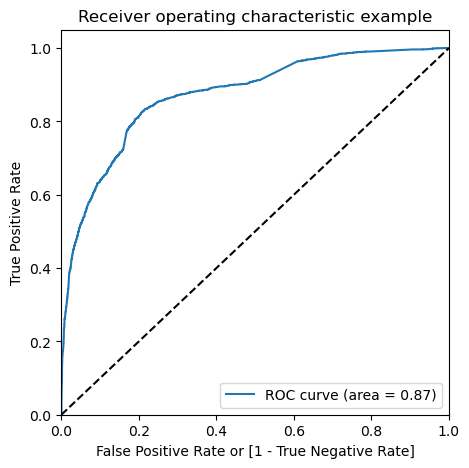

In [91]:
#Calling the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is 0.87 which is good. So we seem to have a good model. 

Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.`

In [92]:
#Creation of columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ref,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.026196,7241,0,1,0,0,0,0,0,0,0,0,0
1,0,0.143274,9226,0,1,1,0,0,0,0,0,0,0,0
2,0,0.052700,1225,0,1,0,0,0,0,0,0,0,0,0
3,1,0.422177,4686,0,1,1,1,1,1,0,0,0,0,0
4,0,0.256061,58,0,1,1,1,0,0,0,0,0,0,0


Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

In [93]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383891  1.000000  0.000000
0.1   0.1  0.566276  0.978113  0.309664
0.2   0.2  0.743300  0.881132  0.657418
0.3   0.3  0.799218  0.836981  0.775688
0.4   0.4  0.809213  0.786038  0.823654
0.5   0.5  0.797769  0.663019  0.881731
0.6   0.6  0.794727  0.582264  0.927110
0.7   0.7  0.783427  0.509434  0.954150
0.8   0.8  0.762277  0.421887  0.974371
0.9   0.9  0.712444  0.266415  0.990360


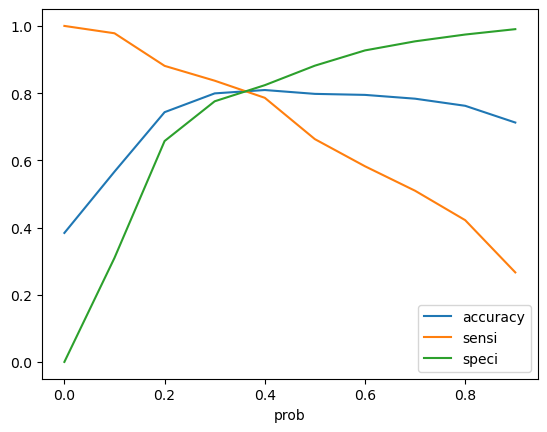

In [94]:
#Plotting the line for the same

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Based on the chart, we observe optimal values around 0.37. Let's select 0.37 as our new cutoff threshold

In [95]:
# From the curve above, 0.37 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ref,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.026196,7241,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.143274,9226,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.052700,1225,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.422177,4686,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.256061,58,0,1,1,1,0,0,0,0,0,0,0,0


### a) Accuracy

In [96]:
#Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8071852817615529

In [97]:
#Confusion matrix again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3450,  803],
       [ 528, 2122]], dtype=int64)

In [98]:
#Evaluation of other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### b) Sensitivity

In [99]:
#Calculate Sensitivity

TP/(TP+FN)

0.8007547169811321

### c) Specificity

In [100]:
#Calculate Specificity

TN/(TN+FP)

0.8111920996943334

The cutoff point 0.37 seems to be good. And with this cut off we have accuracy and specificity around 81% and sensitivity around 80% 

## 10. Precision and Recall View


In [101]:
#Looking at the confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3750,  503],
       [ 893, 1757]], dtype=int64)

In [102]:
#Precision -> TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7774336283185841

In [103]:
#Recall -> TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6630188679245284

## 11. Precision and recall tradeoff

In [104]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6898    0
 6899    1
 6900    1
 6901    0
 6902    0
 Name: Converted, Length: 6903, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6898    0
 6899    0
 6900    0
 6901    0
 6902    0
 Name: Predicted, Length: 6903, dtype: int64)

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

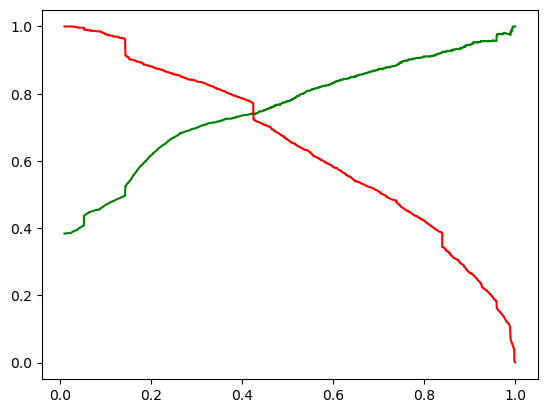

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

As we can see that around 0.43, we get the optimal tradeoff between precision and recall. So let's choose 0.43 as our cutoff now.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead_ref,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.026196,7241,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.143274,9226,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.052700,1225,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.422177,4686,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.256061,58,0,1,1,1,0,0,0,0,0,0,0,0


### a) Accuracy


In [108]:
#Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7957409821816601

In [109]:
#Creation of the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3587,  666],
       [ 744, 1906]], dtype=int64)

In [110]:
#Evaluation of the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### b) Sensitivity

In [111]:
#Calculate Precision

TP/(TP+FP)

0.7410575427682737

### c) Specificity

In [112]:
#Calculate Recall

TP/(TP+FN)

0.7192452830188679

## 12. Now, Prediction on test set

In [113]:
#Scale the test set as well using just 'transform'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [114]:
#Substituting all the columns in the final train model
col = X_train.columns

In [115]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6611,0,0,-0.486412,-0.718641,-0.631447,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3207,0,0,0.123266,2.173455,0.808433,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2248,0,0,0.326493,-0.484196,0.088493,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5888,0,0,-0.283186,-0.802895,-0.151487,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7397,0,0,-0.079960,-0.203961,0.328473,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Adding constant to X_test

X_test_sm = sm.add_constant(X_test[col])
#Check X_test_sm

X_test_sm

,const,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6611,1.0,0,0,-0.486412,-0.718641,-0.631447,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3207,1.0,0,0,0.123266,2.173455,0.808433,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2248,1.0,0,0,0.326493,-0.484196,0.088493,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5888,1.0,0,0,-0.283186,-0.802895,-0.151487,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7397,1.0,0,0,-0.079960,-0.203961,0.328473,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,1.0,0,0,-0.689638,-0.885317,-1.111407,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4305,1.0,0,0,0.529719,-0.202130,1.768354,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5973,1.0,0,0,0.326493,-0.407269,1.288394,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1982,1.0,0,0,0.326493,2.028759,1.288394,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
# Making predictions on the test set and store it in new variable 'y_test_pred'
X_test = sm.add_constant(X_test)
X_test = X_test[X_train_sm.columns]
y_test_pred = res.predict(X_test)
y_test_pred[:10]

6611    0.164137
3207    0.933556
2248    0.197521
5888    0.093742
7397    0.155556
1594    0.949304
300     0.052700
6950    0.421316
6805    0.712293
8486    0.090495
dtype: float64

In [118]:
#Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
y_pred_1.head()

,0
6611,0.164137
3207,0.933556
2248,0.197521
5888,0.093742
7397,0.155556


In [120]:
#Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 

y_pred_2 = y_pred_1.reset_index(drop=True)

y_test_df.reset_index(drop=True, inplace=True)

In [121]:
#Appending the df y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_2],axis=1)



y_pred_final.head()

,Converted,0
0,0,0.164137
1,1,0.933556
2,0,0.197521
3,0,0.093742
4,0,0.155556


In [122]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_Prob'})

y_pred_final.head()

,Converted,Converted_Prob
0,0,0.164137
1,1,0.933556
2,0,0.197521
3,0,0.093742
4,0,0.155556


In [123]:
#Making predictions on the test set using 0.43 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

### a) Accuracy

In [124]:
#Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7966101694915254

In [125]:
#Creation of the final confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1179,  240],
       [ 228,  654]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### b) Sensitivity

In [127]:
#Calculate sensitivity
TP / float(TP+FN)

0.7414965986394558

### c) Specificity


In [128]:
#Calculate specificity
TN / float(TN+FP)

0.8308668076109936

Final Results:

- The model achieves an accuracy nearly 80% on the test data, indicating its effectiveness in predicting the 'converted' variable using the selected features.
- Both sensitivity and specificity values closely mirror those of the training set, suggesting consistent performance across different datasets.
- Given these metrics, the model demonstrates robust predictive capability and is suitable for making reliable predictions on the dataset.

## 13. Calculation of lead scores

In [129]:
#Standardizing the values from the lead_df dataframe
lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [130]:
#Dropping columns which are not relevant/required
lead_df=lead_df[col]

In [131]:
#Predicting the values for the entire dataset
lead_df = sm.add_constant(lead_df)
lead_df = lead_df[X_train_sm.columns]
lead_score_pred=res.predict(lead_df)
lead_score_pred[:10]

0    0.143274
1    0.354604
2    0.587960
3    0.140648
4    0.352123
5    0.052700
6    0.751377
7    0.052700
8    0.097714
9    0.156302
dtype: float64

In [132]:
#Converting the lead score predictor to dataframe
lead_score_pred=pd.DataFrame(lead_score_pred)

lead_score_pred

,0
0,0.143274
1,0.354604
2,0.587960
3,0.140648
4,0.352123
...,...
9235,0.375164
9236,0.390683
9237,0.126603
9238,0.640150


In [133]:
#Renaming relevant columns
lead_score_pred.index.names = ['Lead_Ref']
lead_score_pred.columns = ['Calculated Lead Score']
lead_score_pred

,Calculated Lead Score
Lead_Ref,
0,0.143274
1,0.354604
2,0.587960
3,0.140648
4,0.352123
...,...
9235,0.375164
9236,0.390683
9237,0.126603


In [134]:
#Multiplying the predicted probabilities by 100 to find the lead score
lead_score_pred = round(lead_score_pred*100)
lead_score_pred = lead_score_pred.astype(int)
lead_score_pred

,Calculated Lead Score
Lead_Ref,
0,14
1,35
2,59
3,14
4,35
...,...
9235,38
9236,39
9237,13


Hence we can see that the lead scores have been calculated from 0 to 100 for all leads in the database.

## 14. Displaying final list of coefficients

In [135]:
#Using parameter function
res.params

const                                                  -0.935315
Do Not Email                                           -1.418059
Total Time Spent on Website                             0.963550
Lead Source_Direct Traffic                             -0.559833
Lead Source_Welingak Website                            2.755532
Last Activity_Converted to Lead                        -1.341549
Last Activity_None                                     -1.453436
Last Activity_Olark Chat Conversation                  -1.100634
Lead Origin_Lead Add Form                               3.439238
What is your current occupation_Working Professional    2.826707
Last Notable Activity_SMS Sent                          1.483721
Last Notable Activity_Unreachable                       1.326286
dtype: float64

## 15.Final Result


The below columns are used to predict if the lead is likely to be converted with approximately 80% accuracy.

Feature	Correlation: 
- Do Not Email                                           -1.418059
- Total Time Spent on Website                             0.963550
- Lead Source_Direct Traffic                             -0.559833
- Lead Source_Welingak Website                            2.755532
- Last Activity_Converted to Lead                        -1.341549
- Last Activity_None                                     -1.453436
- Last Activity_Olark Chat Conversation                  -1.100634
- Lead Origin_Lead Add Form                               3.439238
- What is your current occupation_Working Professional    2.826707
- Last Notable Activity_SMS Sent                          1.483721
- Last Notable Activity_Unreachable                       1.326286